In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.cluster import KMeans

from scipy import stats
from scipy.stats import kurtosis, skew

In [3]:
# use pandas to model the episode ratings csv data into a data frame
episode_ratings = pd.read_csv('got_ep_ratings.csv')

In [4]:
# use pandas to model the reddit csv data into a data frame
reddit_data = pd.read_csv('reddit_data.csv')

In [5]:
# because only the title and body of the Reddit threads are useful, I make them both into a list
thread_title_list = reddit_data[:]['title'].tolist()
thread_body_list = reddit_data[:]['body'].tolist()

In [6]:
# use pandas to model the character wiki data into a data frame
characters_wiki = pd.read_csv('characters_fandom.csv')

In [7]:
# extract the first name of the characters by using the .loc method of pandas
first_name_list = characters_wiki.loc[:]['first'].tolist()

In [8]:
# traverse through the Reddit threads data and get the number of times that each main character's name is mentioned in the title and body of Reddit threads
name_mention_dict ={}
for first_name in first_name_list:
    name_mention_dict[first_name] = 0
    for i in thread_title_list:
        if first_name in i:
            name_mention_dict[first_name] += 1
    for body in thread_body_list:
        body = str(body)
        if first_name in body:
            name_mention_dict[first_name] += 1

<BarContainer object of 43 artists>

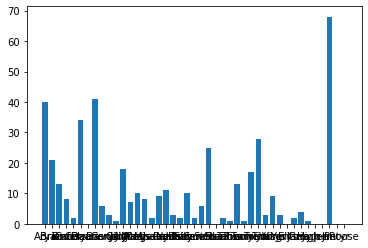

In [9]:
# build a bar chart to visualize the name mentions data
keys = name_mention_dict.keys()
values = name_mention_dict.values()
plt.bar(keys, values)

In [10]:
# add the number of name mentions as a column to the pandas data frame
characters_wiki['thread_name_mentions'] = name_mention_dict.values()

In [11]:
# transforming the episode ratings data into a list
ep_ratings_list = episode_ratings.loc[:]['ep_rating'].tolist()

In [12]:
# transforming the episode titles data into a list
ep_title_list = episode_ratings.loc[:]['ep_title'].tolist()

In [13]:
# build a dictionary where the keys are episode titles, and the values are episode ratings
ep_ratings_dict = {ep_title_list[i]:ep_ratings_list[i] for i in range(len(ep_title_list))}

In [14]:
ep_first_seen_list = characters_wiki.loc[:]['ep_first_seen'].tolist()

In [15]:
# build an empty list and use a for loop to find the ratings corresponding to the episode that each character first appeared
ep_first_seen_ratings = []
for ep in ep_first_seen_list:
    ep_first_seen_ratings.append(ep_ratings_dict[ep[1:-1]])

In [16]:
#build an empty list and use a for loop to find the ratings corresponding to the episode that each character first appeared
first_ep_ratings = []
for i in ep_first_seen_list:
    first_ep_ratings.append(ep_ratings_dict[i[1:-1]])

In [17]:
# adding the first-seen episode ratings data as a new column to the data frame
characters_wiki['first_ep_rating'] = first_ep_ratings

In [18]:
# transform the last seen episode column on the data frame to a list
ep_last_seen_list = characters_wiki.loc[:]['ep_last_seen'].tolist()

In [19]:
# build an empty list and use a for loop to find the ratings corresponding to the episode that each character last appeared
ep_last_seen_ratings = []
for ep in ep_last_seen_list:
    ep_last_seen_ratings.append(ep_ratings_dict[ep[1:-1]])

In [20]:
# adding the last-seen episode ratings data as a new column to the data frame
characters_wiki['last_ep_rating'] = ep_last_seen_ratings 

In [21]:
#checking for data types to make sure that the key metrics are in float or integer types - for later analysis purposes
characters_wiki.dtypes

name                     object
first                    object
last                     object
ep_first_seen            object
ep_last_seen             object
num_ep_appeared           int64
thread_name_mentions      int64
first_ep_rating         float64
last_ep_rating          float64
dtype: object

In [22]:
# establish the x and y axis of the scatter plot chart to find out the relationship between character's number of episode appeared and character popularity
x = characters_wiki['num_ep_appeared']
y = characters_wiki['thread_name_mentions']

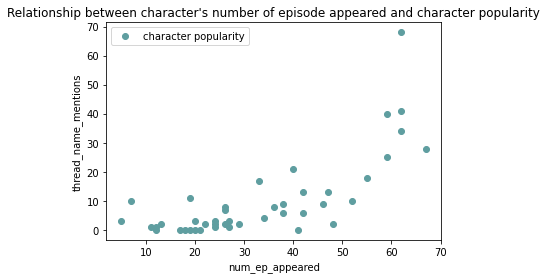

In [23]:
# create a scatter plot chart
plt.plot(x, y, 'o', color ='cadetblue', label = 'character popularity')
# declaring the two axis and the labels of the scatter plot
plt.title("Relationship between character's number of episode appeared and character popularity")
plt.xlabel("num_ep_appeared")
plt.ylabel("thread_name_mentions")
#add a legend
plt.legend()
#show the scatter plot below
plt.show()

In [24]:
# establish the x and y axis of the scatter plot chart to find out the relationship between character's first seen episode rating and character popularity
x1 = characters_wiki['first_ep_rating']
y1 = characters_wiki['thread_name_mentions']

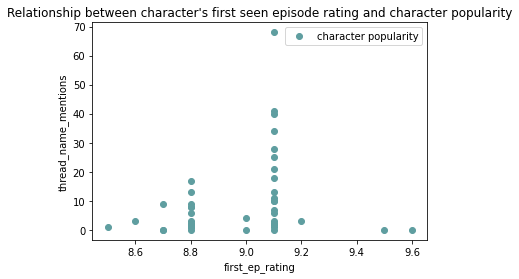

In [25]:
# create a scatter plot chart
plt.plot(x1, y1, 'o', color ='cadetblue', label = 'character popularity')
# declaring the two axis and the labels of the scatter plot
plt.title("Relationship between character's first seen episode rating and character popularity")
plt.xlabel("first_ep_rating")
plt.ylabel("thread_name_mentions")
#show the legend
plt.legend()
#show the scatter plot below
plt.show()

In [26]:
#establish the x and y axis of the scatter plot chart to find out the relationship between character's last seen episode rating and character popularity
x2 = characters_wiki['last_ep_rating']
y2 = characters_wiki['thread_name_mentions']

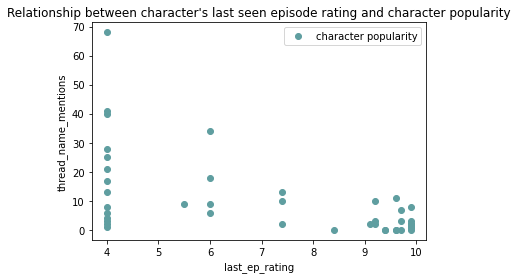

In [27]:
# create a scatter plot chart
plt.plot(x2, y2, 'o', color ='cadetblue', label = 'character popularity')
# declaring the two axis and the labels of the scatter plot
plt.title("Relationship between character's last seen episode rating and character popularity")
plt.xlabel("last_ep_rating")
plt.ylabel("thread_name_mentions")
#show a legend
plt.legend()
#show the scatter plot below
plt.show()

In [28]:
#using sklearn to create a K-means clustering visualization that creates 3 clusters
#the x-axis is the number of total episodes that a character appeared 
#the y-axis is the number of times that the character's name is mentioned in top GoT reddit threads
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(characters_wiki[['first_ep_rating','last_ep_rating']])
y_predicted

array([0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0,
       2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int32)

In [29]:
#run the clustering to add a column to the data frame with the number of cluster for each row: 0 or 1 or 2
characters_wiki['cluster']=y_predicted

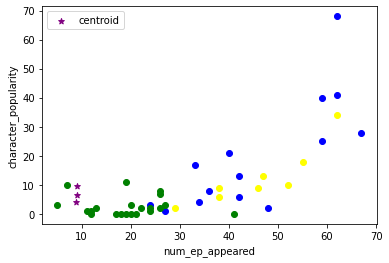

In [30]:
# visualize the clustering with the centroids indicated in purple
# I found the demo by dhavalsays very helpful in creating a clustering visualization - https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb
#first, create 3 dataframes for the 3 clusters
df1 = characters_wiki[characters_wiki.cluster==0]
df2 = characters_wiki[characters_wiki.cluster==1]
df3 = characters_wiki[characters_wiki.cluster==2]
# then, use the matplotlib scatter plot methods to plot the clusters onto the graph
plt.scatter(df1.num_ep_appeared,df1['thread_name_mentions'],color='blue')
plt.scatter(df2.num_ep_appeared,df2['thread_name_mentions'],color='green')
plt.scatter(df3.num_ep_appeared,df3['thread_name_mentions'],color='yellow')
# display the centroids of each cluster by a purple star marker
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# define labels for the x and y axis
plt.xlabel('num_ep_appeared')
plt.ylabel('character_popularity')
# add a legend to the graph
plt.legend()

In [31]:
# lastly, calculate the correlations among the key metrics in the data frame
characters_wiki.corr()

,num_ep_appeared,thread_name_mentions,first_ep_rating,last_ep_rating,cluster
num_ep_appeared,1.000000,0.737241,0.097800,-0.717681,-0.140963
thread_name_mentions,0.737241,1.000000,0.209295,-0.554208,-0.275553
first_ep_rating,0.097800,0.209295,1.000000,0.081140,0.068261
last_ep_rating,-0.717681,-0.554208,0.081140,1.000000,0.509948
cluster,-0.140963,-0.275553,0.068261,0.509948,1.000000


In [32]:
#Answering the questions for the final project
#1.	Your name: Yixing Chai

In [ ]:
#2.Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.):
# The web scrapers work pretty slowly even with not that many rows.

In [ ]:
# 3.Any libraries that need to be installed to run your code (see above): 
# matplotlib and sklearn packages has to be imported for data visualizations
# pandas needs to be imported for data modeling and manipulation
# numpy and math are imported for data analysis

In [ ]:
# 4.Anything else you feel is relevant to the grading of your project your project: No.

In [ ]:
#5.	What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)
# I set out to study the reasons why a Game of Thrones character is popular.
# I investigated the correlations between GoT character popularity (number of times their names are mentioned in top Reddit threads) and factors including the number of episodes they appeared, the rating of the first and last episode that they are seen.

In [ ]:
#6.	What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)
# My assumption is that the number of episodes a characters appear in, the ratings of the first episode they appear in, and the rating of the last episode they appear in all had positive correlations with their level of popularity.
# The scatter-plot visualization and clustering showed that the only positive correlation is the number of episode a character appear in and their levels of popularity. There is a strong positive correlation coefficient of 0.74. 
# There are no significant correlations found for the ratings of the episode that a character first or last appear in and their levels of popularity.

In [ ]:
#7.	What difficulties did you have in completing the project?  
# The web scrapers are challenging to build because the information I'm trying to get is all contained many levels under a main tag, so the debug process was very long
# To scrape the character wiki dataset, I first had to scrape Wikipedia for a list of main character names (a list of the last part of the URL for the character Wiki) so that I could use a for loop to scrape the character wikis
# The Character Wiki dataset was scraped and had to be cleaned manually because there were a few missing rows and one row had wrong information (likely due to the fact that one particular page is coded differently from the others).


In [ ]:
#8.	What skills did you wish you had while you were doing the project?
# I wish I had a deeper understanding of pandas methods for data manipulation
# I wish I knew more about the sklearn package to build data visualizations
# I wish I was more proficient with Beautiful Soup that I could extract information hidden many levels under the main tag more easily

In [ ]:
#9.	What would you do “next” to expand or augment the project?    
# For now, the character popularity is only based on the number of times that a character's name is mentioned on Reddit threads, however, that is not a comprehensive measurement.
# As the next step, I want to take into account more factors, such as the number of followers on the character's Facebook page, the survey data where people voted on their favorite characters, and etc.
# Another thing is that for now 